In [105]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from multiprocessing import Pool
import datetime

In [47]:
features = [
    "smart_242_raw",
    "smart_9_normalized",
    "smart_241_raw",
    "smart_7_raw",
    "smart_7_normalized",
    "smart_193_raw",
    "smart_187_normalized",
    "smart_187_raw",
    "smart_197_raw",
    "smart_198_raw",
    "smart_9_raw",
    "smart_240_raw",
    "smart_4_raw",
    "smart_12_raw",
    "smart_5_raw",
    "smart_183_normalized",
    "smart_183_raw",
    "smart_3_normalized",
    "smart_192_raw",
    "smart_5_normalized",
    "smart_190_normalized",
    "smart_190_raw",
    "smart_194_normalized",
    "smart_194_raw",
    "smart_197_normalized",
    "smart_198_normalized",
    "smart_188_raw",
    "smart_199_raw",
    "smart_193_normalized",
]

files = [
    "data/Q1_2019.csv",
    "data/Q2_2019.csv",
    "data/Q3_2019.csv",
    "data/Q4_2019.csv",
    "data/Q1_2020.csv",
    "data/Q2_2020.csv",
    "data/Q3_2020.csv",
    "data/Q4_2020.csv",
]

dtypes = {k: float for k in features}.update({
    "serial_number": str,
    "model": str,
    "failure": int
})

In [48]:
def read_csv(filename: str):
    column_names = "date,serial_number,model,failure," + ",".join(features)
    column_names = column_names.split(",")
    model = "ST4000DM000"

    result_df = pd.DataFrame(columns=column_names)

    with pd.read_csv(
        filename,
        usecols=column_names,
        chunksize=100000,
        parse_dates=["date"],
        dtype=dtypes,
    ) as current_df:
        for chunk in current_df:
            chunk = chunk[chunk.model == model]
            result_df = result_df.append(chunk)
        print(f"{filename} done")

    return result_df


def generate_df(files: list):
    with Pool(processes=8) as pool:
        df_list = pool.map(read_csv, files)
        combined_df = pd.concat(df_list)

    return combined_df


In [6]:
# result_df = generate_df(files)

data/Q1_2019.csv done
data/Q2_2019.csv done
data/Q3_2019.csv done
data/Q4_2019.csv done
data/Q1_2020.csv done
data/Q2_2020.csv done
data/Q3_2020.csv done
data/Q4_2020.csv done


In [7]:
# result_df.sort_values(by=["date"], inplace=True)
# result_df.drop(["model"], axis=1, inplace=True)
# result_df

,date,serial_number,failure,smart_242_raw,smart_9_normalized,smart_241_raw,smart_7_raw,smart_7_normalized,smart_193_raw,smart_187_normalized,...,smart_5_normalized,smart_190_normalized,smart_190_raw,smart_194_normalized,smart_194_raw,smart_197_normalized,smart_198_normalized,smart_188_raw,smart_199_raw,smart_193_normalized
0,2019-01-01,Z305B2QN,0,1.183566e+11,70,4.553972e+10,291686676.0,84.0,34169.0,100.0,...,100.0,80.0,20.0,20,20,100.0,100.0,0.0,0.0,83.0
71037,2019-01-01,Z304JMHA,0,1.218928e+11,69,4.688013e+10,325030395.0,84.0,14640.0,100.0,...,100.0,82.0,18.0,18,18,100.0,100.0,0.0,0.0,93.0
71036,2019-01-01,S3010LTK,0,1.117603e+11,65,4.637778e+10,256631592.0,84.0,165258.0,100.0,...,100.0,76.0,24.0,24,24,100.0,100.0,0.0,0.0,18.0
71034,2019-01-01,Z30457LR,0,1.059114e+11,69,4.710327e+10,327145728.0,84.0,14166.0,100.0,...,100.0,79.0,21.0,21,21,100.0,100.0,0.0,0.0,93.0
71033,2019-01-01,Z302DZHP,0,1.003997e+11,61,5.716529e+10,620864219.0,87.0,53106.0,100.0,...,100.0,81.0,19.0,19,19,100.0,100.0,0.0,0.0,74.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14519692,2020-12-31,Z305GW2A,0,2.909088e+11,53.0,5.493741e+10,367213322.0,85.0,4465.0,100.0,...,100.0,72.0,28.0,28.0,28.0,100.0,100.0,0.0,0.0,98.0
14519686,2020-12-31,Z305GW2Y,0,2.941102e+11,52.0,5.339527e+10,264148097.0,84.0,4267.0,100.0,...,100.0,68.0,32.0,32.0,32.0,100.0,100.0,0.0,0.0,98.0
14519685,2020-12-31,Z3051ZGV,0,2.654003e+11,56.0,3.937510e+10,123203027.0,81.0,14484.0,99.0,...,100.0,82.0,18.0,18.0,18.0,100.0,100.0,0.0,0.0,93.0
14519787,2020-12-31,Z304TR9Z,0,2.923166e+11,50.0,5.929178e+10,664823126.0,87.0,30600.0,100.0,...,100.0,80.0,20.0,20.0,20.0,100.0,100.0,0.0,0.0,85.0


In [32]:
# result_df.to_pickle("data/ST4000DM000")
result_df = pd.read_pickle("data/ST4000DM000")

In [33]:
failed_df = result_df[result_df.failure == 1][["date", "serial_number"]]
failed_df

,date,serial_number
71537,2019-01-01,S300ZREZ
67885,2019-01-01,S300YTAY
186223,2019-01-02,Z3026Q5Y
182106,2019-01-02,Z302T6AB
216648,2019-01-03,W300THEG
...,...,...
13335650,2020-12-24,Z304HLZZ
13579825,2020-12-25,Z305CVD1
13541299,2020-12-25,Z305D5CQ
13534860,2020-12-25,S301GQPM


In [34]:
for row in failed_df.itertuples():
    result_df.loc[(result_df.serial_number == row.serial_number) & (row.date - result_df.date <= datetime.timedelta(days=15)), "failure"] = 1

In [37]:
result_df[result_df.failure == 1]

,date,serial_number,failure,smart_242_raw,smart_9_normalized,smart_241_raw,smart_7_raw,smart_7_normalized,smart_193_raw,smart_187_normalized,...,smart_5_normalized,smart_190_normalized,smart_190_raw,smart_194_normalized,smart_194_raw,smart_197_normalized,smart_198_normalized,smart_188_raw,smart_199_raw,smart_193_normalized
71245,2019-01-01,Z302F0C0,1,2.104491e+11,61,2.556660e+10,203666022.0,83.0,58849.0,100.0,...,100.0,80.0,20.0,20,20,100.0,100.0,1.0,0.0,71.0
71537,2019-01-01,S300ZREZ,1,1.305077e+11,65,5.472184e+10,487998014.0,87.0,35093.0,49.0,...,100.0,75.0,25.0,25,25,100.0,100.0,0.0,0.0,83.0
67885,2019-01-01,S300YTAY,1,1.178197e+11,64,5.381062e+10,493291407.0,87.0,36331.0,100.0,...,99.0,81.0,19.0,19,19,100.0,100.0,0.0,0.0,82.0
77463,2019-01-01,Z3059CCB,1,1.246712e+11,71,4.521880e+10,359304620.0,85.0,9765.0,95.0,...,100.0,76.0,24.0,24,24,100.0,100.0,0.0,0.0,96.0
79371,2019-01-01,Z3026Q5Y,1,1.117400e+11,67,5.281613e+10,505509924.0,87.0,19016.0,97.0,...,100.0,77.0,23.0,23,23,100.0,100.0,0.0,0.0,91.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13579825,2020-12-25,Z305CVD1,1,2.641611e+11,52.0,5.422008e+10,267316457.0,84.0,9158.0,50.0,...,99.0,69.0,31.0,31.0,31.0,100.0,100.0,0.0,0.0,96.0
13631373,2020-12-25,Z304JLEN,1,2.751554e+11,48.0,6.362826e+10,915480419.0,89.0,6452.0,100.0,...,100.0,79.0,21.0,21.0,21.0,100.0,100.0,0.0,0.0,97.0
13541299,2020-12-25,Z305D5CQ,1,9.205509e+11,51.0,5.822963e+10,532781030.0,87.0,2705.0,100.0,...,100.0,82.0,18.0,18.0,18.0,100.0,100.0,0.0,0.0,99.0
13534860,2020-12-25,S301GQPM,1,9.212493e+11,49.0,5.913021e+10,725057086.0,88.0,11783.0,95.0,...,100.0,77.0,23.0,23.0,23.0,100.0,100.0,0.0,0.0,95.0


In [3]:
# result_df.to_pickle("data/ST4000DM000_bt")
backtracked_df = pd.read_pickle("data/ST4000DM000_bt")

In [4]:
backtracked_df

,date,serial_number,failure,smart_242_raw,smart_9_normalized,smart_241_raw,smart_7_raw,smart_7_normalized,smart_193_raw,smart_187_normalized,...,smart_5_normalized,smart_190_normalized,smart_190_raw,smart_194_normalized,smart_194_raw,smart_197_normalized,smart_198_normalized,smart_188_raw,smart_199_raw,smart_193_normalized
0,2019-01-01,Z305B2QN,0,1.183566e+11,70,4.553972e+10,291686676.0,84.0,34169.0,100.0,...,100.0,80.0,20.0,20,20,100.0,100.0,0.0,0.0,83.0
71037,2019-01-01,Z304JMHA,0,1.218928e+11,69,4.688013e+10,325030395.0,84.0,14640.0,100.0,...,100.0,82.0,18.0,18,18,100.0,100.0,0.0,0.0,93.0
71036,2019-01-01,S3010LTK,0,1.117603e+11,65,4.637778e+10,256631592.0,84.0,165258.0,100.0,...,100.0,76.0,24.0,24,24,100.0,100.0,0.0,0.0,18.0
71034,2019-01-01,Z30457LR,0,1.059114e+11,69,4.710327e+10,327145728.0,84.0,14166.0,100.0,...,100.0,79.0,21.0,21,21,100.0,100.0,0.0,0.0,93.0
71033,2019-01-01,Z302DZHP,0,1.003997e+11,61,5.716529e+10,620864219.0,87.0,53106.0,100.0,...,100.0,81.0,19.0,19,19,100.0,100.0,0.0,0.0,74.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14519692,2020-12-31,Z305GW2A,0,2.909088e+11,53.0,5.493741e+10,367213322.0,85.0,4465.0,100.0,...,100.0,72.0,28.0,28.0,28.0,100.0,100.0,0.0,0.0,98.0
14519686,2020-12-31,Z305GW2Y,0,2.941102e+11,52.0,5.339527e+10,264148097.0,84.0,4267.0,100.0,...,100.0,68.0,32.0,32.0,32.0,100.0,100.0,0.0,0.0,98.0
14519685,2020-12-31,Z3051ZGV,0,2.654003e+11,56.0,3.937510e+10,123203027.0,81.0,14484.0,99.0,...,100.0,82.0,18.0,18.0,18.0,100.0,100.0,0.0,0.0,93.0
14519787,2020-12-31,Z304TR9Z,0,2.923166e+11,50.0,5.929178e+10,664823126.0,87.0,30600.0,100.0,...,100.0,80.0,20.0,20.0,20.0,100.0,100.0,0.0,0.0,85.0


In [8]:
healthy_df = backtracked_df[backtracked_df.failure == 0].sample(n=21170)
healthy_df = healthy_df.drop(["date", "serial_number"], axis=1)
failure_df = backtracked_df[backtracked_df.failure == 1]
failure_df = failure_df.drop(["date", "serial_number"], axis=1)

In [10]:
failure_df

,failure,smart_242_raw,smart_9_normalized,smart_241_raw,smart_7_raw,smart_7_normalized,smart_193_raw,smart_187_normalized,smart_187_raw,smart_197_raw,...,smart_5_normalized,smart_190_normalized,smart_190_raw,smart_194_normalized,smart_194_raw,smart_197_normalized,smart_198_normalized,smart_188_raw,smart_199_raw,smart_193_normalized
71245,1,2.104491e+11,61,2.556660e+10,203666022.0,83.0,58849.0,100.0,0.0,0.0,...,100.0,80.0,20.0,20,20,100.0,100.0,1.0,0.0,71.0
71537,1,1.305077e+11,65,5.472184e+10,487998014.0,87.0,35093.0,49.0,51.0,24.0,...,100.0,75.0,25.0,25,25,100.0,100.0,0.0,0.0,83.0
67885,1,1.178197e+11,64,5.381062e+10,493291407.0,87.0,36331.0,100.0,0.0,0.0,...,99.0,81.0,19.0,19,19,100.0,100.0,0.0,0.0,82.0
77463,1,1.246712e+11,71,4.521880e+10,359304620.0,85.0,9765.0,95.0,5.0,8.0,...,100.0,76.0,24.0,24,24,100.0,100.0,0.0,0.0,96.0
79371,1,1.117400e+11,67,5.281613e+10,505509924.0,87.0,19016.0,97.0,3.0,32.0,...,100.0,77.0,23.0,23,23,100.0,100.0,0.0,0.0,91.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13579825,1,2.641611e+11,52.0,5.422008e+10,267316457.0,84.0,9158.0,50.0,50.0,88.0,...,99.0,69.0,31.0,31.0,31.0,100.0,100.0,0.0,0.0,96.0
13631373,1,2.751554e+11,48.0,6.362826e+10,915480419.0,89.0,6452.0,100.0,0.0,0.0,...,100.0,79.0,21.0,21.0,21.0,100.0,100.0,0.0,0.0,97.0
13541299,1,9.205509e+11,51.0,5.822963e+10,532781030.0,87.0,2705.0,100.0,0.0,0.0,...,100.0,82.0,18.0,18.0,18.0,100.0,100.0,0.0,0.0,99.0
13534860,1,9.212493e+11,49.0,5.913021e+10,725057086.0,88.0,11783.0,95.0,5.0,8.0,...,100.0,77.0,23.0,23.0,23.0,100.0,100.0,0.0,0.0,95.0


In [12]:
training_data = pd.concat([healthy_df, failure_df])
training_data

,failure,smart_242_raw,smart_9_normalized,smart_241_raw,smart_7_raw,smart_7_normalized,smart_193_raw,smart_187_normalized,smart_187_raw,smart_197_raw,...,smart_5_normalized,smart_190_normalized,smart_190_raw,smart_194_normalized,smart_194_raw,smart_197_normalized,smart_198_normalized,smart_188_raw,smart_199_raw,smart_193_normalized
4498572,0,2.629982e+11,56.0,5.513108e+10,180783986.0,82.0,14547.0,100.0,0.0,0.0,...,100.0,74.0,26.0,26.0,26.0,100.0,100.0,0.0,0.0,93.0
5371968,0,1.867518e+11,60.0,5.298756e+10,979113071.0,90.0,3521.0,100.0,0.0,0.0,...,100.0,75.0,25.0,25.0,25.0,100.0,100.0,0.0,0.0,99.0
8347840,0,1.420471e+11,55.0,4.503615e+10,966257758.0,90.0,10012.0,100.0,0.0,0.0,...,100.0,80.0,20.0,20.0,20.0,100.0,100.0,0.0,0.0,95.0
5621642,0,1.341765e+11,58.0,5.774370e+10,794673503.0,88.0,53107.0,100.0,0.0,0.0,...,100.0,78.0,22.0,22.0,22.0,100.0,100.0,0.0,0.0,74.0
1930387,0,2.261110e+11,53.0,5.829742e+10,285229139.0,84.0,8926.0,95.0,5.0,8.0,...,100.0,71.0,29.0,29.0,29.0,100.0,100.0,0.0,0.0,96.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13579825,1,2.641611e+11,52.0,5.422008e+10,267316457.0,84.0,9158.0,50.0,50.0,88.0,...,99.0,69.0,31.0,31.0,31.0,100.0,100.0,0.0,0.0,96.0
13631373,1,2.751554e+11,48.0,6.362826e+10,915480419.0,89.0,6452.0,100.0,0.0,0.0,...,100.0,79.0,21.0,21.0,21.0,100.0,100.0,0.0,0.0,97.0
13541299,1,9.205509e+11,51.0,5.822963e+10,532781030.0,87.0,2705.0,100.0,0.0,0.0,...,100.0,82.0,18.0,18.0,18.0,100.0,100.0,0.0,0.0,99.0
13534860,1,9.212493e+11,49.0,5.913021e+10,725057086.0,88.0,11783.0,95.0,5.0,8.0,...,100.0,77.0,23.0,23.0,23.0,100.0,100.0,0.0,0.0,95.0


In [38]:
X_train = training_data.drop(["failure"], axis=1)
y_train = training_data.failure

In [39]:
X_train[X_train.smart_242_raw.isnull()]

,smart_242_raw,smart_9_normalized,smart_241_raw,smart_7_raw,smart_7_normalized,smart_193_raw,smart_187_normalized,smart_187_raw,smart_197_raw,smart_198_raw,...,smart_5_normalized,smart_190_normalized,smart_190_raw,smart_194_normalized,smart_194_raw,smart_197_normalized,smart_198_normalized,smart_188_raw,smart_199_raw,smart_193_normalized
3445052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
y_train[3445052]

1

In [41]:
X_train.drop(3445052, inplace=True)
y_train.drop(3445052, inplace=True)

In [42]:
X_train[X_train.smart_242_raw.isnull()]

,smart_242_raw,smart_9_normalized,smart_241_raw,smart_7_raw,smart_7_normalized,smart_193_raw,smart_187_normalized,smart_187_raw,smart_197_raw,smart_198_raw,...,smart_5_normalized,smart_190_normalized,smart_190_raw,smart_194_normalized,smart_194_raw,smart_197_normalized,smart_198_normalized,smart_188_raw,smart_199_raw,smart_193_normalized


In [43]:
y_train = y_train.astype(int)

In [45]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [62]:
test_df = generate_df(["data/Q1_2021.csv", "data/Q2_2021.csv"])

data/Q1_2021.csv done
data/Q2_2021.csv done


In [63]:
test_df

,date,serial_number,model,failure,smart_242_raw,smart_9_normalized,smart_241_raw,smart_7_raw,smart_7_normalized,smart_193_raw,...,smart_5_normalized,smart_190_normalized,smart_190_raw,smart_194_normalized,smart_194_raw,smart_197_normalized,smart_198_normalized,smart_188_raw,smart_199_raw,smart_193_normalized
1,2021-01-01,Z305B2QN,ST4000DM000,0,5.457889e+11,50.0,5.940338e+10,575702825.0,87.0,34432.0,...,100.0,80.0,20.0,20.0,20.0,100.0,100.0,0.0,0.0,83.0
12,2021-01-01,Z305DEMG,ST4000DM000,0,2.484189e+11,52.0,5.176624e+10,132117905.0,81.0,52495.0,...,100.0,74.0,26.0,26.0,26.0,100.0,100.0,0.0,0.0,74.0
33,2021-01-01,Z305DEMX,ST4000DM000,0,2.445755e+11,50.0,5.916600e+10,532235163.0,87.0,34459.0,...,100.0,81.0,19.0,19.0,19.0,100.0,100.0,0.0,0.0,83.0
65,2021-01-01,Z305D6ZM,ST4000DM000,0,2.489662e+11,51.0,5.805989e+10,456693403.0,86.0,4685.0,...,100.0,79.0,21.0,21.0,21.0,100.0,100.0,0.0,0.0,98.0
102,2021-01-01,S301NGZV,ST4000DM000,0,7.669134e+11,49.0,6.030740e+10,508325542.0,87.0,17308.0,...,100.0,71.0,29.0,29.0,29.0,100.0,100.0,0.0,0.0,92.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16226421,2021-06-30,Z304VZDD,ST4000DM000,0,2.911769e+11,47.0,5.238018e+10,452511510.0,86.0,53941.0,...,100.0,72.0,28.0,28.0,28.0,100.0,100.0,0.0,0.0,74.0
16226422,2021-06-30,S300YQF7,ST4000DM000,0,3.056074e+11,40.0,6.954386e+10,193940159.0,82.0,42198.0,...,100.0,77.0,23.0,23.0,23.0,100.0,100.0,0.0,0.0,79.0
16226443,2021-06-30,S300XLFH,ST4000DM000,0,2.929800e+11,41.0,6.887636e+10,118525365.0,81.0,42664.0,...,100.0,70.0,30.0,30.0,30.0,100.0,100.0,0.0,0.0,79.0
16226466,2021-06-30,S300XCF3,ST4000DM000,0,3.520796e+11,41.0,6.193621e+10,934881693.0,89.0,46028.0,...,100.0,78.0,22.0,22.0,22.0,100.0,100.0,0.0,0.0,77.0


In [64]:
failed_test_df = test_df[test_df.failure == 1][["date", "serial_number"]]
failed_test_df

,date,serial_number
225623,2021-01-02,S301K7NR
243918,2021-01-02,Z302SZMS
344358,2021-01-03,Z304K098
590634,2021-01-04,Z302T67W
1188178,2021-01-08,S301GP9K
...,...,...
14886764,2021-06-23,Z305DFTG
15030030,2021-06-24,S301NJHQ
15155313,2021-06-25,Z30404S0
15439803,2021-06-26,S301GM27


In [65]:
for row in failed_test_df.itertuples():
    test_df.loc[(test_df.serial_number == row.serial_number) & (row.date - test_df.date <= datetime.timedelta(days=15)), "failure"] = 1

In [66]:
test_df[test_df.failure == 1][["date", "serial_number"]]

,date,serial_number
11665,2021-01-01,Z3059AHR
13390,2021-01-01,Z304K098
14206,2021-01-01,Z302AKR7
30537,2021-01-01,S301GP9K
30699,2021-01-01,S300Z7MC
...,...,...
15283596,2021-06-25,S301GPK5
15439803,2021-06-26,S301GM27
15466177,2021-06-26,S301GPK5
15648584,2021-06-27,S301GPK5


In [67]:
test_df.drop(["date", "serial_number", "model"], axis=1, inplace=True)
healthy_test_df = test_df[test_df.failure == 0].sample(n=5000)
failure_test_df = test_df[test_df.failure == 1]

In [68]:
testing_data = pd.concat([healthy_test_df, failure_test_df])
testing_data

,failure,smart_242_raw,smart_9_normalized,smart_241_raw,smart_7_raw,smart_7_normalized,smart_193_raw,smart_187_normalized,smart_187_raw,smart_197_raw,...,smart_5_normalized,smart_190_normalized,smart_190_raw,smart_194_normalized,smart_194_raw,smart_197_normalized,smart_198_normalized,smart_188_raw,smart_199_raw,smart_193_normalized
11670178,0,2.673087e+11,42.0,6.785562e+10,931473527.0,89.0,40679.0,100.0,0.0,0.0,...,100.0,79.0,21.0,21.0,21.0,100.0,100.0,0.0,0.0,80.0
13134304,0,2.764542e+11,44.0,6.603762e+10,952220900.0,90.0,8509.0,100.0,0.0,0.0,...,100.0,53.0,47.0,47.0,47.0,100.0,100.0,0.0,0.0,96.0
14888619,0,2.808909e+11,48.0,5.916641e+10,696324685.0,88.0,32784.0,100.0,0.0,0.0,...,100.0,78.0,22.0,22.0,22.0,100.0,100.0,0.0,0.0,84.0
1092130,0,2.441894e+11,49.0,6.132745e+10,678038830.0,88.0,8628.0,100.0,0.0,0.0,...,100.0,77.0,23.0,23.0,23.0,100.0,100.0,0.0,0.0,96.0
11476339,0,2.873987e+11,47.0,5.806533e+10,604444922.0,87.0,8768.0,100.0,0.0,0.0,...,100.0,70.0,30.0,30.0,30.0,100.0,100.0,0.0,0.0,96.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15283596,1,3.005212e+11,43.0,6.555769e+10,415496210.0,86.0,11072.0,100.0,0.0,0.0,...,100.0,78.0,22.0,22.0,22.0,100.0,100.0,0.0,0.0,95.0
15439803,1,2.868439e+11,44.0,6.360605e+10,926440759.0,89.0,14102.0,12.0,88.0,312.0,...,100.0,77.0,23.0,23.0,23.0,99.0,99.0,0.0,0.0,93.0
15466177,1,3.007929e+11,43.0,6.556703e+10,418564867.0,86.0,11072.0,100.0,0.0,0.0,...,100.0,78.0,22.0,22.0,22.0,100.0,100.0,0.0,0.0,95.0
15648584,1,3.010210e+11,43.0,6.557982e+10,421253398.0,86.0,11072.0,100.0,0.0,0.0,...,100.0,78.0,22.0,22.0,22.0,100.0,100.0,0.0,0.0,95.0


In [69]:
X_test = testing_data.drop(["failure"], axis=1)
y_test = testing_data.failure

In [70]:
X_test

,smart_242_raw,smart_9_normalized,smart_241_raw,smart_7_raw,smart_7_normalized,smart_193_raw,smart_187_normalized,smart_187_raw,smart_197_raw,smart_198_raw,...,smart_5_normalized,smart_190_normalized,smart_190_raw,smart_194_normalized,smart_194_raw,smart_197_normalized,smart_198_normalized,smart_188_raw,smart_199_raw,smart_193_normalized
11670178,2.673087e+11,42.0,6.785562e+10,931473527.0,89.0,40679.0,100.0,0.0,0.0,0.0,...,100.0,79.0,21.0,21.0,21.0,100.0,100.0,0.0,0.0,80.0
13134304,2.764542e+11,44.0,6.603762e+10,952220900.0,90.0,8509.0,100.0,0.0,0.0,0.0,...,100.0,53.0,47.0,47.0,47.0,100.0,100.0,0.0,0.0,96.0
14888619,2.808909e+11,48.0,5.916641e+10,696324685.0,88.0,32784.0,100.0,0.0,0.0,0.0,...,100.0,78.0,22.0,22.0,22.0,100.0,100.0,0.0,0.0,84.0
1092130,2.441894e+11,49.0,6.132745e+10,678038830.0,88.0,8628.0,100.0,0.0,0.0,0.0,...,100.0,77.0,23.0,23.0,23.0,100.0,100.0,0.0,0.0,96.0
11476339,2.873987e+11,47.0,5.806533e+10,604444922.0,87.0,8768.0,100.0,0.0,0.0,0.0,...,100.0,70.0,30.0,30.0,30.0,100.0,100.0,0.0,0.0,96.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15283596,3.005212e+11,43.0,6.555769e+10,415496210.0,86.0,11072.0,100.0,0.0,0.0,0.0,...,100.0,78.0,22.0,22.0,22.0,100.0,100.0,0.0,0.0,95.0
15439803,2.868439e+11,44.0,6.360605e+10,926440759.0,89.0,14102.0,12.0,88.0,312.0,312.0,...,100.0,77.0,23.0,23.0,23.0,99.0,99.0,0.0,0.0,93.0
15466177,3.007929e+11,43.0,6.556703e+10,418564867.0,86.0,11072.0,100.0,0.0,0.0,0.0,...,100.0,78.0,22.0,22.0,22.0,100.0,100.0,0.0,0.0,95.0
15648584,3.010210e+11,43.0,6.557982e+10,421253398.0,86.0,11072.0,100.0,0.0,0.0,0.0,...,100.0,78.0,22.0,22.0,22.0,100.0,100.0,0.0,0.0,95.0


In [74]:
X_test[X_test.smart_9_raw.isnull()]

,smart_242_raw,smart_9_normalized,smart_241_raw,smart_7_raw,smart_7_normalized,smart_193_raw,smart_187_normalized,smart_187_raw,smart_197_raw,smart_198_raw,...,smart_5_normalized,smart_190_normalized,smart_190_raw,smart_194_normalized,smart_194_raw,smart_197_normalized,smart_198_normalized,smart_188_raw,smart_199_raw,smart_193_normalized
9635347,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
X_test.drop(9635347, inplace=True)
y_test.drop(9635347, inplace=True)

In [81]:
y_test = y_test.astype(int)
y_test

11670178    0
13134304    0
14888619    0
1092130     0
11476339    0
           ..
15283596    1
15439803    1
15466177    1
15648584    1
15830974    1
Name: failure, Length: 7313, dtype: int64

In [82]:
y_pred = clf.predict(X_test)

In [89]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred), metrics.recall_score(y_test, y_pred), metrics.f1_score(y_test, y_pred))

0.8137563243538903 0.4308556611927398 0.5941597139451728


In [96]:
from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression().fit(X_train, y_train)
y_pred_lr = lrc.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_lr), metrics.recall_score(y_test, y_pred_lr), metrics.f1_score(y_test, y_pred_lr))

0.6835771913031587 0.0 0.0


In [97]:
from sklearn import svm
svmc = svm.SVC()
svmc.fit(X_train, y_train)
y_pred_svm = svmc.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_svm), metrics.recall_score(y_test, y_pred_svm), metrics.f1_score(y_test, y_pred_svm))

0.6848078763845207 0.056179775280898875 0.10136452241715399


In [98]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier().fit(X_train, y_train)
y_pred_dt = dtc.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_dt), metrics.recall_score(y_test, y_pred_dt), metrics.f1_score(y_test, y_pred_dt))

0.7806645699439354 0.4170267934312878 0.5461233729485003


In [106]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=20).fit(X_train, y_train)
y_pred_kn = knc.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_kn), metrics.recall_score(y_test, y_pred_kn), metrics.f1_score(y_test, y_pred_kn))

0.6436482975523041 0.22255834053586862 0.2832783278327833


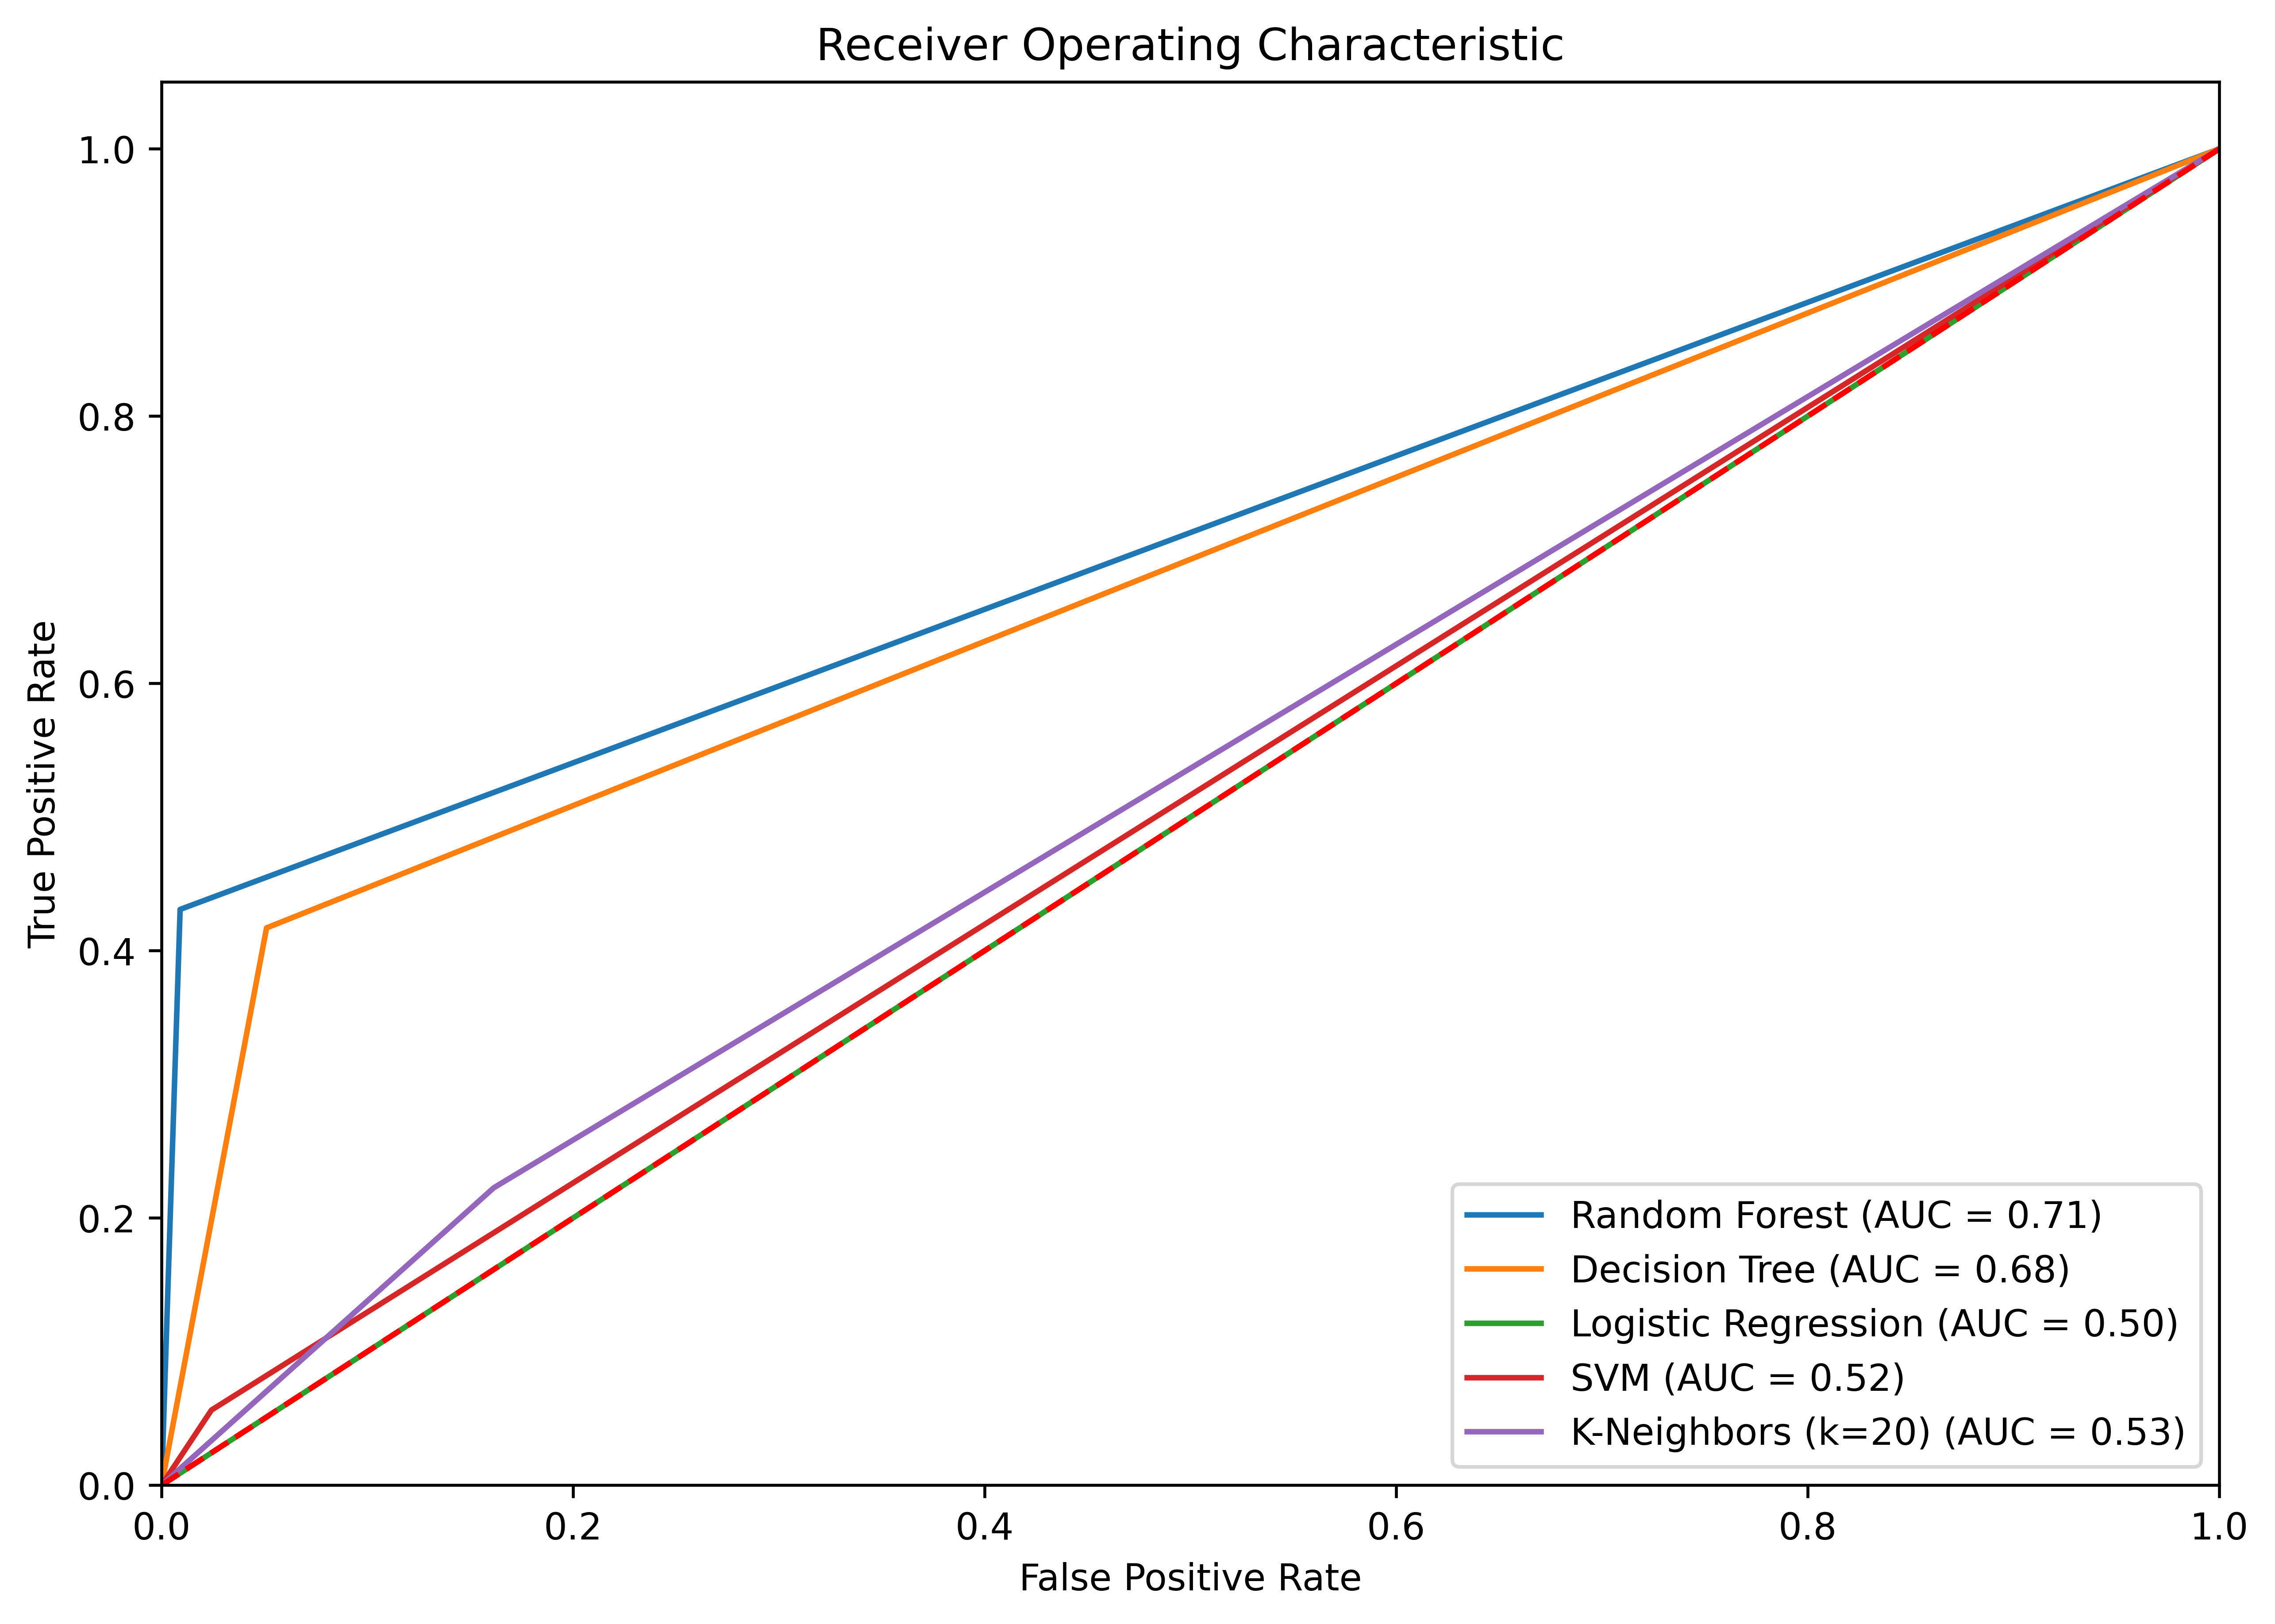

In [114]:
models = [
    ["Random Forest", y_pred],
    ["Decision Tree", y_pred_dt],
    ["Logistic Regression", y_pred_lr],
    ["SVM", y_pred_svm],
    ["K-Neighbors (k=20)", y_pred_kn]
]

fig = plt.figure(figsize=(10,7), dpi=600)

for m in models:
    fpr, tpr, thresholds = metrics.roc_curve(y_test, m[1])
    auc = metrics.roc_auc_score(y_test,m[1])
    plt.plot(fpr, tpr, label='%s (AUC = %0.2f)' % (m[0], auc))

# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display
